In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris = data('iris')

**NOTE: LINKS ONLY WORK IN JUPYTER NOTEBOOK**

**Colors**
- [Set Theme](#settheme)
- [Find Colors in Theme](#findthemecolors)
- [Conditionally set Colors](#condcolor)


**[Inset Graphs](#inset)**


### Colors

##### Set Theme <a class='anchor' id='settheme' />

In [3]:
sns.set_theme(palette ='colorblind')

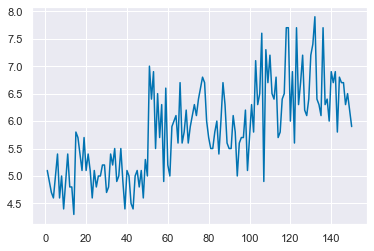

In [4]:
plt.plot(iris['Sepal.Length']);

##### Find colors in your theme <a class='anchor' id='findthemecolors' />

In [5]:
pal = sns.color_palette('colorblind')
pal.as_hex()

['#0173b2',
 '#de8f05',
 '#029e73',
 '#d55e00',
 '#cc78bc',
 '#ca9161',
 '#fbafe4',
 '#949494',
 '#ece133',
 '#56b4e9']

In [6]:
print(pal.as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


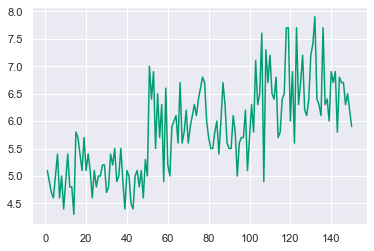

In [7]:
# Say I want the green, just grab the third hex code:
clr = '#029e73'
plt.plot(iris['Sepal.Length'], color = clr);

##### Conditionally set the color <a class='anchor' id='condcolor' />

Note, this doesn't work for line plots, as that is a line, not a particular value.  Probably would work for marker color (as it represents a single point)

Essentially, np.where creates an array of colors and then applies the appropriate color to each bar

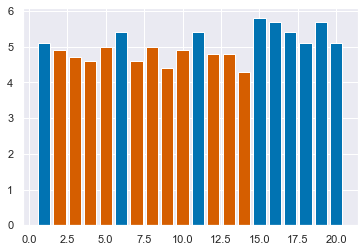

In [8]:
y = iris['Sepal.Length']
plt.bar(iris.index[:20],iris['Sepal.Length'][:20], color=np.where(iris['Sepal.Length'][:20]>5, '#0173b2', '#d55e00'));

### Inset Graphs  <a class='anchor' id='inset' />

**Note:** this isn't the best example dataset, but it gets the point across.

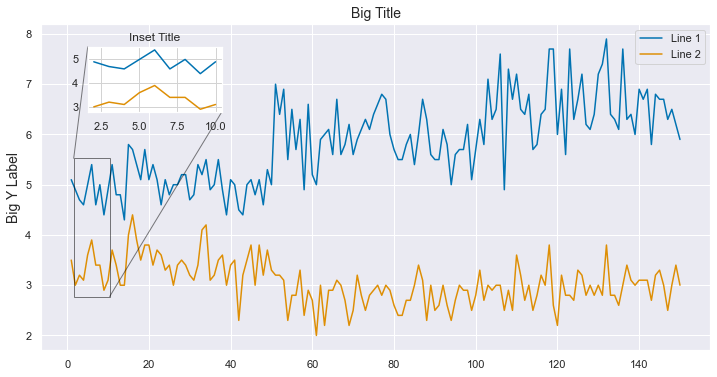

In [12]:
#needed if plotting time series
import matplotlib.dates as mdates

#Initialize figure and axis - will need to modify axes
fig, ax = plt.subplots(figsize=[12,6])

#CREATE BIG PLOT
#plot two lines
ax.plot(iris['Sepal.Length'],label='Line 1');
ax.plot(iris['Sepal.Width'],label='Line 2');
#set title and ylabel
ax.set_title("Big Title",size=14);
ax.set_ylabel("Big Y Label",size=14);
# ax.autoscale(enable=True, axis='x', tight=True); #makes x axis tight

#CREATE INSET PLOT
#SET DIMENSIONS for inset location
#  [distance from left axis, distance from y axis, width, height]
#  ALL DIMENSIONS are from 0-1 (a fraction of plot size)
#  Values larger than 1 will create a second axis that travels outside the bounds of the orginial plot
#  The first two determine the bottom left corner (dist from left, dist from bottom)
#  The second two represent size of inset (width, height)
dims = [.07, .73, .2,.2] 
#create new axis with those dimensions
axin = ax.inset_axes(dims) 
#plot a subset of those same two lines above
axin.plot(iris['Sepal.Length'][1:10])
axin.plot(iris['Sepal.Width'][1:10])
#set small title
axin.set(title="Inset Title")
#inverse colors for inset 
# optional formatting - I like how it works with my standard theme/palette
axin.set(facecolor='white')
axin.grid(color='lightgrey')

# INSET XLabel Formatting for TIME SERIES
# locator = mdates.AutoDateLocator(minticks=3,maxticks=7) #set acceptable tick range
# formatter = mdates.ConciseDateFormatter(locator) #format with concise dates
# axin.xaxis.set_major_locator(locator)
# axin.xaxis.set_major_formatter(formatter)

# Draw lines to inset
ax.indicate_inset_zoom(axin,edgecolor='black')
plt.legend()
plt.show()
